For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.



1. Has the network latency gone up since we switched internet service providers?


- Null Hypothesis: There is no difference in network latency since switching providers.
- Alt Hypothesis: The networklatency has gone up since we switched internet service providers.

- True Pos:
We correctely fail to reject that there is no difference in network latency since switching providers. 

- True Neg:
We correctely reject that that there is no difference in network latency since switching providers.. 

- Type 1: 
We incorrecly say that latency since switching when there is. 
- Type II:
We incorrectly say that the redesign had no effect when it did. 

2. Is the website redesign any good?

- Null Hypothesis: The website redesign had no effect. 

- Alt Hypothesis: The website redesign had a positve effect.

- True Pos:
We correctely fail to reject that the redesign had no effect. 

- True Neg:
We correctely reject that the redesign had no effect. 

- Type 1: 
We incorrecly say that that the redesin had an effect when it did not. 

- Type II:
We incorrectly say that the redesign had no effect when it did. 

3. Is our television ad driving more sales?

In [22]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
from env import host, user, password

4. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [23]:
Office1_mean = 90
Office1_std_dev = 15
n1 = 40

Office2_mean = 100
Office2_std_dev = 20
n2 = 50

a = .05

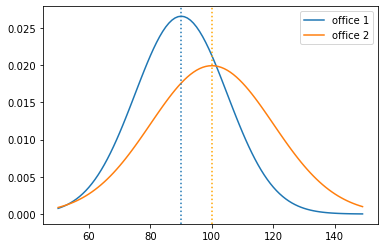

In [24]:
x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)


plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()


In [25]:
t, p = stats.ttest_ind_from_stats(90,15,40, 100,20,50, equal_var=False)
t,p,a

(-2.7091418459143854, 0.00811206270346016, 0.05)

In [26]:
print(f'''
Because the p-value ({p}) is less than alpha value ({a}),we reject the null hypothesis''')


Because the p-value (0.00811206270346016) is less than alpha value (0.05),we reject the null hypothesis


5. Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


- Are compact cars more fuel-efficient than the average car?


- Do manual cars get better gas mileage than automatic cars?

In [27]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [28]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


$H_0$: there is no difference in fuel-efficiency in cars from 2008 vs 1999

$H_a$: there is a difference in fuel-efficiency in cars from 2008 vs 1999

In [29]:
mpg['fuel_efficiency'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)

In [30]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [31]:
fuel_efficiency08 = mpg[mpg.year == 2008].fuel_efficiency

In [32]:
fuel_efficiency99 = mpg[mpg.year == 1999].fuel_efficiency

<AxesSubplot:>

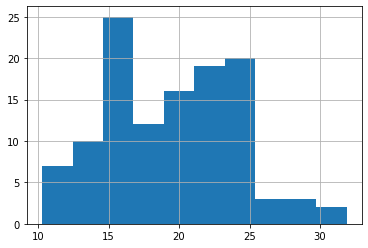

In [33]:
fuel_efficiency08.hist()

<AxesSubplot:>

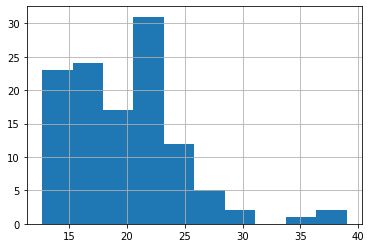

In [34]:
fuel_efficiency99.hist()

In [35]:
fuel_efficiency08.var(), fuel_efficiency99.var()

(22.550836772260343, 25.850396545865912)

In [36]:
a = 0.05

In [37]:
t, p = stats.ttest_ind(fuel_efficiency08, fuel_efficiency99, equal_var=False)
t, p, a

(-0.3011962975077886, 0.7635358418225436, 0.05)

In [38]:
if (p/2 < a) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


In [39]:
fuel_efficiency08.mean(), fuel_efficiency99.mean()
# almpst no difference in means

(19.488662986569054, 19.68238764869729)

- Are compact cars more fuel-efficient than the average car?

In [40]:
compact_fuel_efficiency = mpg[mpg['class'] == 'compact'].fuel_efficiency
avg_car_fuel_efficiency = mpg.fuel_efficiency.mean()

In [41]:
t,p = stats.ttest_1samp(compact_fuel_efficiency, avg_car_fuel_efficiency)
t, p/2, a

(7.512360093161354, 7.808833174403864e-10, 0.05)

In [42]:
if (p/2 < a) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


- Do manual cars get better gas mileage than automatic cars?

In [43]:
manual_fuel_efficiency = mpg[mpg.trans.str.contains('manual')].fuel_efficiency


auto_fuel_efficiency = mpg[mpg.trans.str.contains('auto')].fuel_efficiency

a
a = 0.05


In [44]:
manual_fuel_efficiency.var(), auto_fuel_efficiency.var()

(25.665633639828275, 20.428279095002054)

In [45]:

t, p = stats.ttest_ind(manual_fuel_efficiency, auto_fuel_efficiency, equal_var = False)
t, p/2, a


(4.47444321386703, 7.99035135103976e-06, 0.05)

In [46]:
if (p/2 < a) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")



We reject the null hypothesis


## Correlation Exercises

1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?


In [47]:
telco_churn = pd.read_csv('telco_churn.csv')

telco_churn.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [48]:
r, p = stats.pearsonr(telco_churn.tenure, telco_churn.MonthlyCharges)


In [49]:
r

0.2478998562861525

In [50]:
p

4.094044991483017e-99

In [51]:
telco_churn.TotalCharges.fillna(0)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [52]:
def get_db_url(db_name):
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
    
sql = '''
select *, DATEDIFF(curdate(), hire_date) as 'days'
from employees
join salaries using (emp_no)
where salaries.to_date > curdate();
'''
    
url = get_db_url("employees")

employees = pd.read_sql(sql, url)
employees  

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,days
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,12919
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,13136
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,12856
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,12761
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,11745
...,...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,52868,2002-06-01,9999-01-01,10527
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,69501,2002-05-12,9999-01-01,11365
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01,12985
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01,10253


3. Use the sleepstudy data. Is there a relationship between days and reaction time?

## Chi Square Exercises

1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.
                    Codeup Student	Not Codeup Student
    - Uses a Macbook       	 49        	 20
    - Doesn't Use A Macbook	  1	         30

In [78]:
a = 0.05

In [79]:
observed = pd.DataFrame([[49,20], [1,30]])
observed.columns = ['Codeup Student', 'Not Codeup Student']
observed.index = ['Macbook', 'No Macbook']
observed

,Codeup Student,Not Codeup Student
Macbook,49,20
No Macbook,1,30


In [80]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [81]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34 34]
 [15 15]]
---

chi^2 = 36.6526
p     = 0.0000


In [82]:
if p < a:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


2. Choose another 2 categorical variables from the mpg dataset and perform a 
c
h
i
2
 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [58]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


Null Hypothesis: There is no difference in fuel_efficency based on manufacturer.

Alt Hypothesis: There is a difference in fuel_efficency based on manufacturer.
    
    

In [59]:
observed = pd.crosstab(mpg.manufacturer, mpg.fuel_efficiency)
observed

fuel_efficiency,10.285714,12.320000,12.692308,13.037037,13.357143,13.714286,14.068966,14.344828,14.400000,14.733333,...,28.070175,28.800000,29.466667,29.508197,29.836066,30.295082,31.876923,33.971429,37.714286,38.987342
manufacturer,,,,,,,,,,,,,,,,,,,,,
audi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chevrolet,0,1,2,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
dodge,4,0,4,2,2,2,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
ford,0,0,1,0,2,0,0,2,1,3,...,0,0,0,0,0,0,0,0,0,0
honda,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,1,0,0,0,0
hyundai,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jeep,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
land rover,0,0,2,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
lincoln,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
a = 0.05

In [61]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [62]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[0 0 0 ... 0 0 0]
 [0 1 2 ... 0 0 0]
 [4 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 1 1 1]]
---
Expected

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
---

chi^2 = 1427.9144
p     = 0.0000


In [76]:
if p < a:
    print('We reject the null')
else:
    print("we fail to reject the null")

we fail to reject the null


3. Use the data from the employees database to answer these questions:

   - Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
   -  Is an employee's gender independent of whether or not they are or have been a manager?

Null Hypothesis: An employee's gender is independent of whether or not an employee works in sales or marketing.

Alt Hypothesis: An employee's gender is not independent of whether or not an employee works in sales or marketing.

In [97]:
def get_db_url(db_name):
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'


sql_query ='''
SELECT e.gender, d.dept_name
FROM employees AS e
JOIN dept_emp as de ON de.emp_no = e.emp_no
AND to_date > CURDATE()
JOIN departments AS d ON de.dept_no = d.dept_no
'''

url = get_db_url("employees")

employees = pd.read_sql(sql_query, url)
employees

,gender,dept_name
0,M,Customer Service
1,F,Customer Service
2,M,Customer Service
3,F,Customer Service
4,F,Customer Service
...,...,...
240119,F,Sales
240120,M,Sales
240121,M,Sales
240122,F,Sales


In [100]:
employees = employees[(employees.dept_name == 'Sales') | (employees.dept_name == 'Marketing')]

employees

,gender,dept_name
104290,F,Marketing
104291,M,Marketing
104292,F,Marketing
104293,F,Marketing
104294,F,Marketing
...,...,...
240119,F,Sales
240120,M,Sales
240121,M,Sales
240122,F,Sales


In [102]:
observed = pd.crosstab(employees.gender, employees.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [103]:
a = 0.05

In [105]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [106]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 5864 14999]
 [ 8978 22702]]
---
Expected

[[ 5893 14969]
 [ 8948 22731]]
---

chi^2 = 0.3240
p     = 0.5692


In [107]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

we fail to reject the null


Null Hypothesis: An employee's gender is independent of whether or not they are or have been a manager.

Alt Hypothesis: An employee's gender is not independent of whether or not they are or have been a manager.
    

In [84]:
def get_db_url(db_name):
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'


sql_query ='''
SELECT e.emp_no, e.gender, dm.dept_no
FROM employees as e
LEFT JOIN dept_manager AS dm ON e.emp_no = dm.emp_no'''

url = get_db_url("employees")

In [85]:
employees = pd.read_sql(sql_query, url)
employees

,emp_no,gender,dept_no
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None
...,...,...,...
300019,499995,F,None
300020,499996,M,None
300021,499997,M,None
300022,499998,M,None


In [86]:
employees.dept_no.value_counts()

d004    4
d006    4
d009    4
d002    2
d008    2
d007    2
d003    2
d001    2
d005    2
Name: dept_no, dtype: int64

In [87]:
employees = employees.rename(columns={'dept_no': 'manager'}).fillna(0)



In [88]:
employees['manager'] = employees['manager'].apply(lambda x: x if x == 0 else 1)



In [89]:
employees

,emp_no,gender,manager
0,10001,M,0
1,10002,F,0
2,10003,M,0
3,10004,M,0
4,10005,M,0
...,...,...,...
300019,499995,F,0
300020,499996,M,0
300021,499997,M,0
300022,499998,M,0


In [90]:
employees.manager.value_counts()

0    300000
1        24
Name: manager, dtype: int64

In [91]:
observed = pd.crosstab(employees.gender, employees.manager)
observed

manager,0,1
gender,,
F,120038,13
M,179962,11


In [92]:
a = 0.05

In [93]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [94]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[120038     13]
 [179962     11]]
---
Expected

[[120041      9]
 [179958     14]]
---

chi^2 = 1.4567
p     = 0.2275


In [95]:
if p < a:
    print('We reject the null')
else:
    print("we fail to reject the null")

we fail to reject the null
